# Regression Model

**Purpose of script:**

- Test regression model suitability in data fusion context
- Test different regressors

## Data Prep

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error

# custom functions:
from functions import read_and_prep_parquet 
from functions import get_rmse

In [2]:
from functions import convert_to_tif

Relevant paths:

In [3]:
df_path = r"../Data/combined/pandas_extended/"

In [4]:
X_train, y_train = read_and_prep_parquet(df_path + 'melt_2019-07-02_extended.parquet.gzip', 'train')
#X_test, y_test = read_and_prep_parquet(df_path + 'melt_2019-07-02_extended.parquet.gzip', 'test')
X_pred = read_and_prep_parquet(df_path + 'melt_2019-07-01_extended.parquet.gzip', 'predict')



#### Decision tree regressor

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [6]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
#cross_val_score(regressor, X_train, y_train, cv=5)
# random state

DecisionTreeRegressor(random_state=0)

In [7]:
y_predicted = regressor.predict(X_pred)


In [8]:
# rmse = get_rmse(y_test, y_predicted)
# rmse

In [9]:
# join prediction and coordinates (row, col)

In [10]:
X_pred['prediction'] = y_predicted

In [11]:
# in discussion think about how to make outlines better ? or will it not be blocky?  - it probably will 

In [12]:
# original matrix shape:
# data_mw #(2687, 1487) -> y: 2663x: 1462
nan_matrix = np.full((2663, 1462), np.nan)

In [13]:
# for each prediction line
for row in X_pred.iterrows():
    row_index = int(row[1]['row'])
    col_index = int(row[1]['col'])
    pred_val = row[1]['prediction']
    nan_matrix[row_index][col_index] = pred_val

In [14]:
import xarray
import rasterio

In [15]:
# in next cell x and y are wrong - they should be real coordinates, values from old xarray


In [16]:
# original file to take metadata from is interpolated transform
path_metadata_reference =  r"../Data/microwave-rs/mw_interpolated/2019-07-01_mw.tif"
path_out = 'test_prediction_out2.tif'

In [17]:
convert_to_tif(nan_matrix, path_metadata_reference, path_out)

In [71]:
# write with rioxarray but would need to fix coordinates

# data_xr = xarray.DataArray(nan_matrix, 
# coords={'y': list(range(0, nan_matrix.shape[0])),'x': list(range(0, nan_matrix.shape[1]))}, 
# dims=["y", "x"])
# import rioxarray
# # convert to tif?
# data_xr.rio.to_raster('test_prediction_out.tif')

# fig, axes = plt.subplots(ncols=1, figsize=(4,5))
# data_xr.plot(ax=axes)
# plt.draw()
# # plt.plot(nan_matrix)
# # plt.show()

In [72]:
# the blank parts should be filled - go to pandas script and fit that
# test when kernel doesnt crash for once

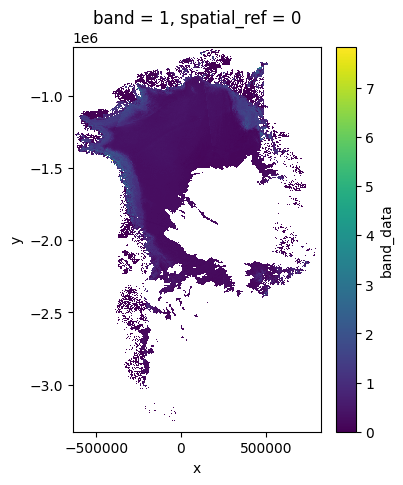

In [73]:
# test opening and plotting
test_data_tif = xarray.open_dataarray('test_prediction_out2.tif')
fig, axes = plt.subplots(ncols=1, figsize=(4,5))
test_data_tif.plot(ax=axes)
plt.draw()


### Linear regression

In [21]:
from sklearn.linear_model import LinearRegression


In [24]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
target_predicted = linear_model.predict(X_test)

In [25]:
rmse = np.sqrt(mean_squared_error(y_test, target_predicted))
rmse

0.3818799687207228